<h1>Этап 1</h1>

<h2>Анализ отзывов по общественным местам.</h2>

In [7]:
pip install wordcloud

<p> Устанавливаем библиотеку для отрисовки облаков слов, которые потребуются для первичного просмотра отзывов</p>

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pymystem3 import Mystem
from string import punctuation 
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

--2022-01-26 11:00:59--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.244, 5.45.205.243, 5.45.205.245, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.244|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2022-01-26 11:00:59--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.3’

mystem-3.0-linux3.1 100%[===================>]  15.70M 

<p>Устанавливаем все нужные библиотеки</p>

   Unnamed: 0  space                                             review class
0           0  Этажи  Интересное пространство. Много выставок, некот...     У
1           1  Этажи  Всё по порядку.\nСамо здание это несколько эта...     К
2           2  Этажи  Место не лишено художественного и социального ...     У
3           3  Этажи  Замечательное место!!!\nБольшой выбор еды. Мно...     К
4           4  Этажи  Любимое местечко питерской молодёжи.\nМагазинч...     У
Unnamed: 0    0
space         0
review        0
class         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


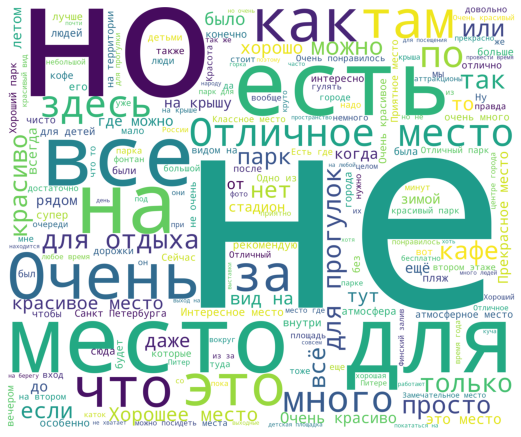

In [3]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus


# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus


# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud


data = pd.read_excel('Classified_spaces.xlsx')

print(data.head())

print(data.isna().sum())


corpus = get_corpus(data['review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<p>Создание необходимых функций для обработки текста и получения первичного облака слов</p>

In [7]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# Удаление знаков пунктуации из текста
def remove_punct(text):
    #  table = {33: '.', 34: ',', 35: '<', 36: '>', 37: '?', 38: '!', 39: '@', 40: '#', 41: '$', 42: '^', 43: '%', 44: '&', 45: '*', 46: '(', 47: ')', 58: '-', 59: '+', 60: '=', 61: '[', 62: ']', 63: '{', 64: '}', 91: ':', 92: ';', 93: '|', 94: '`', 95: '"', 96: '\'', 123: '/', 124: '~', 125: '№', 126: '\n'}
    #  return text.translate(table)
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

clean_reviews = pd.DataFrame(columns=['Review', 'Class'])

mystem = Mystem() 

clean_reviews['Review'] = data['review'].map(lambda x: x.lower())
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x:remove_punct(x))
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: mystem.lemmatize(x))
#  clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: x.split(' '))
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: [token.strip() for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: ' '.join(x))

clean_reviews['Class'] = data['class']

clean_reviews.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Class
0,интересный пространство выставка некоторый пла...,У
1,порядок здание это несколько этаж маленький ма...,К
2,место лишать художественный социальный смысл а...,У
3,замечательный место большой выбор еда разный а...,К
4,любить местечко питерский молодежь магазинчик ...,У


<p>Очищаем данные, убираем стоп-слова, знаки препинания, повторяющиеся символы, скобки и т.д., приводим все слова в начальную форму. Создаем новый датафрейм для обработанных отзывов</p>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


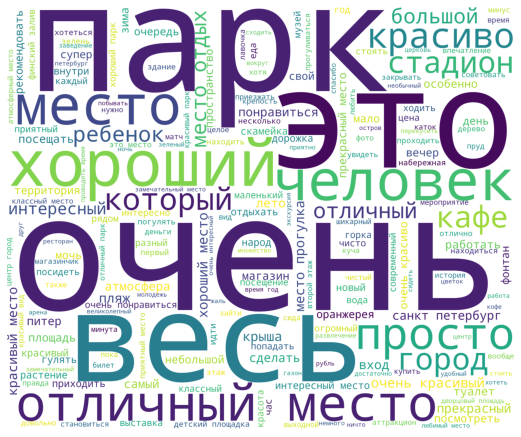

In [8]:
corpus = get_corpus(clean_reviews['Review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<p>Отрисовываем облако слов с обработанными словами</p>

In [86]:
clean_reviews['Class'].value_counts()

К    8042
У    2972
Б     238
Name: Class, dtype: int64

<p>Посмотрим, как распределяются все классы в датасете. Видим, что результаты очень несбалансированны. Были проведены опыты с классификацией на три класса. Максимальная точность - 71%. Этого мало. Попробуем объединить Комфорт и безопасность, посмотрим на результат</p>

In [87]:
clean_reviews.loc[clean_reviews['Class'] == 'Б', 'Class'] = 'К'

<p>Меняем Безопасность на Комфорт</p>

In [88]:
clean_reviews['Class'].value_counts()

К    8280
У    2972
Name: Class, dtype: int64

<p>Классы все равно несбалансированны</p>

<h1> Этап 2. Создание модели для классификации отзывов</h1>

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(clean_reviews['Review'], clean_reviews['Class'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

<p>Делим данные на три выобрки - обучающую, тестовую и валидационную для лучшего результата</p>

In [90]:
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров

<p>Импортируем все нужные библиотеки для обучения и создания моделей</p>

In [91]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000))])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           К       0.75      0.79      0.77      1244
           У       0.46      0.41      0.44       557

    accuracy                           0.67      1801
   macro avg       0.61      0.60      0.60      1801
weighted avg       0.66      0.67      0.67      1801



<p>Первый результат довольно неплохой. Accuracy 0.67, macro avg 0.60. На трех классах макимум был 0.69 и 0.51 </p>

In [92]:
predicted_sgd_val = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd_val, y_valid))

              precision    recall  f1-score   support

           К       0.73      0.82      0.77      1495
           У       0.53      0.41      0.47       756

    accuracy                           0.68      2251
   macro avg       0.63      0.62      0.62      2251
weighted avg       0.67      0.68      0.67      2251



<p>Проверяем на валидационной выборке</p>

In [95]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
from imblearn.pipeline import Pipeline as Pipeln
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule



warnings.simplefilter(action='ignore', category=FutureWarning)

<p>Так как классы несбалансированны, попробуем использовать некоторые приемы для приведения классов в баланс. oversamling, upsampling, SMOTE, TomekLinks...</p>

In [96]:
sgd_ppl_clf = Pipeln([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),

    ('tomek', TomekLinks()),

    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000)),
    ])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           К       0.75      0.79      0.77      1243
           У       0.46      0.41      0.44       558

    accuracy                           0.67      1801
   macro avg       0.61      0.60      0.60      1801
weighted avg       0.66      0.67      0.66      1801



<p>Результат не улучшился</p>

In [ ]:
predicted_sgd = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd, y_valid))

              precision    recall  f1-score   support

           Б       0.25      0.41      0.31        34
           К       0.81      0.78      0.80      1676
           У       0.42      0.45      0.43       541

    accuracy                           0.69      2251
   macro avg       0.49      0.55      0.51      2251
weighted avg       0.71      0.69      0.70      2251



<p>Здесь стало хуже</p>

<h1>Этап 2. Создание нейронных сетей для классификации отзывов</h1>

In [97]:
import numpy as np

import tensorflow as tf


<p>Импортруем нужные библиотеки</p>

In [98]:
new_data = clean_reviews.copy()
new_data.head()

,Review,Class
0,интересный пространство выставка некоторый пла...,У
1,порядок здание это несколько этаж маленький ма...,К
2,место лишать художественный социальный смысл а...,У
3,замечательный место большой выбор еда разный а...,К
4,любить местечко питерский молодежь магазинчик ...,У


<p>Скопируем данные в новый датафрейм</p>

In [99]:
new_data['Class'].values

array(['У', 'К', 'У', ..., 'У', 'У', 'У'], dtype=object)

In [100]:
from sklearn import preprocessing


y = pd.get_dummies(new_data['Class'])


<p>Используем one hot encoding, чтобы предсказывать три класса</p>

In [101]:
y.value_counts()

К  У
1  0    8280
0  1    2972
dtype: int64

<p>Посмотрим на распределение классов</p>

In [102]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
        new_data['Review'], y, test_size=0.25, random_state=1000)

<p>Делим данные на обучающую выборку и тестовую</p>

In [104]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

место лишать художественный социальный смысл атмосфера вполне дух время крыша должно круто хороший погода посидеть солнышко почитать книжка немного отдыхать рабочий суета ноябрь — восторг …
[33, 1, 637, 658, 638]


<p>Токенизируем слова. Превращаем каждое слово в число. Соответственно, целое предложение (отзыв) будет представлять собой вектор из чисел (токенов)</p>

In [105]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[114   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


<p>Теперь увеличиваем вектор до 100 возможных слов, чтобы все отзывы поместились</p>

In [106]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model1.add(layers.GlobalMaxPool1D())
model1.add(layers.Dense(50, activation='relu'))
model1.add(layers.Dense(2, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 50)           495350    
                                                                 
 global_max_pooling1d_10 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 2)                 102       
                                                                 
Total params: 498,002
Trainable params: 498,002
Non-trainable params: 0
_________________________________________________________________


<p>Создаем первую нейронную сеть. Она состоит из 4 уровней с разным количеством нейронов. Посмотрим, как она работает. </p>

In [107]:
history = model1.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=128)
loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
66/66 - 3s - loss: 0.6201 - accuracy: 0.7226 - val_loss: 0.5814 - val_accuracy: 0.7302 - 3s/epoch - 48ms/step
Epoch 2/10
66/66 - 2s - loss: 0.5648 - accuracy: 0.7378 - val_loss: 0.5667 - val_accuracy: 0.7302 - 2s/epoch - 28ms/step
Epoch 3/10
66/66 - 2s - loss: 0.5334 - accuracy: 0.7378 - val_loss: 0.5387 - val_accuracy: 0.7302 - 2s/epoch - 27ms/step
Epoch 4/10
66/66 - 2s - loss: 0.4728 - accuracy: 0.7546 - val_loss: 0.5180 - val_accuracy: 0.7391 - 2s/epoch - 29ms/step
Epoch 5/10
66/66 - 2s - loss: 0.4063 - accuracy: 0.8114 - val_loss: 0.5249 - val_accuracy: 0.7348 - 2s/epoch - 32ms/step
Epoch 6/10
66/66 - 2s - loss: 0.3392 - accuracy: 0.8582 - val_loss: 0.5629 - val_accuracy: 0.7334 - 2s/epoch - 30ms/step
Epoch 7/10
66/66 - 1s - loss: 0.2762 - accuracy: 0.8934 - val_loss: 0.5983 - val_accuracy: 0.7273 - 997ms/epoch - 15ms/step
Epoch 8/10
66/66 - 1s - loss: 0.2222 - accuracy: 0.9218 - val_loss: 0.6673 - val_accuracy: 0.7220 - 1s/epoch - 16ms/step
Epoch 9/10
66/66 - 1s - loss:

<p>Как видно по результатам, на тренировочных данных точность 0.97, а на тестовых - 0.70. Это может говорить о небольшом переобучении</p>

In [108]:
model2 = Sequential()
model2.add(layers.Embedding(vocab_size, embedding_dim,
                           input_length=maxlen, 
                           trainable=False))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(50, activation='softmax'))
model2.add(layers.Dense(5, activation='softmax'))
model2.add(layers.Dense(5, activation='softmax'))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 50)           495350    
                                                                 
 global_max_pooling1d_11 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_27 (Dense)            (None, 50)                2550      
                                                                 
 dense_28 (Dense)            (None, 5)                 255       
                                                                 
 dense_29 (Dense)            (None, 5)                 30        
                                                                 
 dense_30 (Dense)            (None, 2)                 12        
                                                     

<p>Строим следующую модель посложнее </p>

In [109]:


history = model2.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=128)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
66/66 - 1s - loss: 0.6500 - accuracy: 0.7378 - val_loss: 0.6372 - val_accuracy: 0.7302 - 1s/epoch - 22ms/step
Epoch 2/10
66/66 - 1s - loss: 0.6230 - accuracy: 0.7378 - val_loss: 0.6158 - val_accuracy: 0.7302 - 789ms/epoch - 12ms/step
Epoch 3/10
66/66 - 1s - loss: 0.6042 - accuracy: 0.7378 - val_loss: 0.6016 - val_accuracy: 0.7302 - 914ms/epoch - 14ms/step
Epoch 4/10
66/66 - 1s - loss: 0.5919 - accuracy: 0.7378 - val_loss: 0.5930 - val_accuracy: 0.7302 - 548ms/epoch - 8ms/step
Epoch 5/10
66/66 - 0s - loss: 0.5845 - accuracy: 0.7378 - val_loss: 0.5879 - val_accuracy: 0.7302 - 448ms/epoch - 7ms/step
Epoch 6/10
66/66 - 0s - loss: 0.5802 - accuracy: 0.7378 - val_loss: 0.5852 - val_accuracy: 0.7302 - 408ms/epoch - 6ms/step
Epoch 7/10
66/66 - 0s - loss: 0.5778 - accuracy: 0.7378 - val_loss: 0.5840 - val_accuracy: 0.7302 - 418ms/epoch - 6ms/step
Epoch 8/10
66/66 - 0s - loss: 0.5766 - accuracy: 0.7378 - val_loss: 0.5834 - val_accuracy: 0.7302 - 415ms/epoch - 6ms/step
Epoch 9/10
66/66

<p>Здесь точность примерно одинаковая. Она не меняется с первой эпохи</p>

In [110]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 50)           495350    
                                                                 
 global_max_pooling1d_12 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_31 (Dense)            (None, 50)                2550      
                                                                 
 dense_32 (Dense)            (None, 5)                 255       
                                                                 
 dense_33 (Dense)            (None, 2)                 12        
                                                                 
Total params: 498,167
Trainable params: 498,167
Non-trainable params: 0
_______________________________________________

<p>Проверяем еще одну нейросеть</p>

In [111]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=128)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Epoch 1/10
66/66 - 3s - loss: 0.6405 - accuracy: 0.7039 - val_loss: 0.6058 - val_accuracy: 0.7302 - 3s/epoch - 39ms/step
Epoch 2/10
66/66 - 2s - loss: 0.5856 - accuracy: 0.7378 - val_loss: 0.5812 - val_accuracy: 0.7302 - 2s/epoch - 28ms/step
Epoch 3/10
66/66 - 1s - loss: 0.5453 - accuracy: 0.7378 - val_loss: 0.5452 - val_accuracy: 0.7302 - 989ms/epoch - 15ms/step
Epoch 4/10
66/66 - 1s - loss: 0.4715 - accuracy: 0.7638 - val_loss: 0.5214 - val_accuracy: 0.7405 - 984ms/epoch - 15ms/step
Epoch 5/10
66/66 - 1s - loss: 0.3809 - accuracy: 0.8365 - val_loss: 0.5490 - val_accuracy: 0.7341 - 972ms/epoch - 15ms/step
Epoch 6/10
66/66 - 1s - loss: 0.2883 - accuracy: 0.8897 - val_loss: 0.6116 - val_accuracy: 0.7199 - 1s/epoch - 15ms/step
Epoch 7/10
66/66 - 1s - loss: 0.2104 - accuracy: 0.9264 - val_loss: 0.6982 - val_accuracy: 0.7057 - 992ms/epoch - 15ms/step
Epoch 8/10
66/66 - 1s - loss: 0.1478 - accuracy: 0.9535 - val_loss: 0.7979 - val_accuracy: 0.7010 - 943ms/epoch - 14ms/step
Epoch 9/10
66/66 

<p>Тут результат гораздо хуже</p>

In [113]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 100)          990700    
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_14 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_36 (Dense)            (None, 50)                6450      
                                                                 
 dense_37 (Dense)            (None, 2)                 102       
                                                                 
Total params: 1,061,380
Trainable params: 1,061,380
Non-trainable params: 0
___________________________________________

<p>Пробуем новую структуру нейросети</p>

In [114]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=128)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
66/66 - 10s - loss: 0.5812 - accuracy: 0.7356 - val_loss: 0.5649 - val_accuracy: 0.7302 - 10s/epoch - 151ms/step
Epoch 2/10
66/66 - 9s - loss: 0.5048 - accuracy: 0.7522 - val_loss: 0.5327 - val_accuracy: 0.7394 - 9s/epoch - 132ms/step
Epoch 3/10
66/66 - 11s - loss: 0.3888 - accuracy: 0.8313 - val_loss: 0.5878 - val_accuracy: 0.7199 - 11s/epoch - 161ms/step
Epoch 4/10
66/66 - 8s - loss: 0.2524 - accuracy: 0.9052 - val_loss: 0.7693 - val_accuracy: 0.7170 - 8s/epoch - 122ms/step
Epoch 5/10
66/66 - 8s - loss: 0.1430 - accuracy: 0.9537 - val_loss: 0.8710 - val_accuracy: 0.7092 - 8s/epoch - 119ms/step
Epoch 6/10
66/66 - 8s - loss: 0.0780 - accuracy: 0.9775 - val_loss: 1.0175 - val_accuracy: 0.7028 - 8s/epoch - 120ms/step
Epoch 7/10
66/66 - 8s - loss: 0.0481 - accuracy: 0.9854 - val_loss: 1.1908 - val_accuracy: 0.7021 - 8s/epoch - 120ms/step
Epoch 8/10
66/66 - 8s - loss: 0.0331 - accuracy: 0.9900 - val_loss: 1.4071 - val_accuracy: 0.7060 - 8s/epoch - 120ms/step
Epoch 9/10
66/66 - 8

<p>Сново видно переобучение</p>

<h1>Этап 3. Проверка результатов</h1>

In [115]:
my_review = "Жесть конечно. Спертость, духота, помещения вообще не проветриваются. Вентиляции нет вообще. Народу уйма. Вместо того, чтобы закрывать ТЦ с проветриваемым помещениями - закрыли бы эту клоаку под названием этажи."

In [116]:
mystem = Mystem()

my_review = my_review.lower()
my_review = remove_punct(my_review)
my_review = mystem.lemmatize(my_review)

my_review = [token.strip() for token in my_review if token not in russian_stopwords and token != " " and token.strip() not in punctuation]
my_review = ' '.join(my_review)

my_review

'жесть спертость духота помещение вообще проветриваться вентиляция вообще народ уйма вместо закрывать тц проветривать помещение закрывать клоака название этаж'

In [117]:
final = tokenizer.texts_to_sequences([my_review])

In [118]:
final = pad_sequences(final, padding='post', maxlen=maxlen)
final

array([[1818, 2060,  393,  178, 4287, 1668,  178,   92, 2263, 1907,  162,
         865,  393,  162,  846,   49,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int32)

In [121]:
classes = {0 : 'Комфорт', 1 : 'Удовольствия'}

print(classes[np.argmax(model1.predict(final))])
print(classes[np.argmax(model2.predict(final))])

Комфорт
Комфорт


In [122]:
from joblib import dump

In [123]:
dump(model, 'text_classification_2_classes.joblib')
dump(tokenizer, 'Tokenizer.joblib')

INFO:tensorflow:Assets written to: ram://f211255d-bc68-4557-8c11-ce4109d29f53/assets


['text_classification_2_classes.joblib']

<p>Сохраняем модель и токенайзер, чтобы потом ими пользоваться</p>

In [74]:
def preprocess_text(text, mystem, maxlen=100):
    text = text.lower()
    text = remove_punct(text)
    text = mystem.lemmatize(text)

    text = [token.strip() for token in text if token not in russian_stopwords and token != " " and token.strip() not in punctuation]
    text = ' '.join(text)

    final = tokenizer.texts_to_sequences([text])

    final = pad_sequences(final, padding='post', maxlen=maxlen)

    return final

<p>Создаем функцию, которая будет размечать данные о закрытых общественных пространствах</p>

In [126]:
not_classified_data = pd.read_excel("In_Public_spaces_new.xlsx")

#tokenizer = load("Tokenizer.joblib")

mystem = Mystem()

classified_spaces = pd.DataFrame(columns=['Review', 'Model1', 'Model2'])

for i in range(len(not_classified_data)):

    review = preprocess_text(not_classified_data.loc[i]['review'], mystem)
    #print(not_classified_data.loc[i]['review'], classes[np.argmax(model1.predict(review))], classes[np.argmax(model2.predict(review))])
    line = {'Review': not_classified_data.loc[i]['review'], 'Model1': classes[np.argmax(model1.predict(review))], 'Model2': classes[np.argmax(model2.predict(review))]}
    print(i)
    classified_spaces = classified_spaces.append(line, ignore_index=True)

classified_spaces.to_excel("Classified_in_spaces_2_classes.xlsx")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<p>Размечаем данные</p>